# Titanic Kaggle

## by Fatha Marvin

In [50]:
!pip install -Uqq fastbook
from fastai.vision.all import *
from fastbook import *

In [2]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [153]:
from fastai.tabular import *

In [3]:
from dtreeviz.trees import *

In [4]:
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [5]:
from fastai.vision.widgets import *

In [6]:
import fastbook
fastbook.setup_book()

In [7]:
path = URLs.path('Titanic')
path

Path.BASE_PATH = path

In [8]:
train_df = pd.read_csv('train.csv')

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,...,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",...,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",...,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",...,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",...,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",...,373450,8.0500,NaN,S


In [10]:
test_df = pd.read_csv('test.csv')

In [11]:
test_df

,PassengerId,Pclass,Name,Sex,...,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,...,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,...,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,...,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,...,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,...,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,...,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,...,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,...,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,...,359309,8.0500,NaN,S


In [12]:
len(train_df)

891

In [13]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
train_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,  4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [16]:
pclass = 1, 2, 3 

In [52]:
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df['Pclass'].cat.set_categories(pclass, ordered=True, inplace=True)

In [53]:
dep_var = 'Survived'

### Decision Tree

In [54]:
procs = [Categorify, FillMissing, Normalize]

In [55]:
cond = (train_df.Sex == 'female') | (train_df.Pclass > 1)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [158]:
cont,cat = cont_cat_split(train_df, 1, dep_var=dep_var)

In [57]:
to = TabularPandas(train_df, procs, cat, cont, y_names=dep_var, splits=splits)

In [58]:
len(to.train),len(to.valid)

(769, 122)

In [59]:
to.show(5)

,Pclass,Name,Sex,Ticket,Cabin,Embarked,Age_na,PassengerId,Age,SibSp,Parch,Fare,Survived
0,3,"Braund, Mr. Owen Harris",male,A/5 21171,#na#,S,False,1.0,22.0,1.0,0.0,7.250000,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C,False,2.0,38.0,1.0,0.0,71.283302,1
2,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,#na#,S,False,3.0,26.0,0.0,0.0,7.925000,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,False,4.0,35.0,1.0,0.0,53.099998,1
4,3,"Allen, Mr. William Henry",male,373450,#na#,S,False,5.0,35.0,0.0,0.0,8.050000,0


In [60]:
to.items.head(3)

,PassengerId,Survived,Pclass,Name,...,Fare,Cabin,Embarked,Age_na
0,-1.712797,0,3,109,...,-0.472380,0,3,1
1,-1.708935,1,1,191,...,1.086952,82,1,1
2,-1.705072,1,3,354,...,-0.455943,0,3,1


In [61]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [62]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

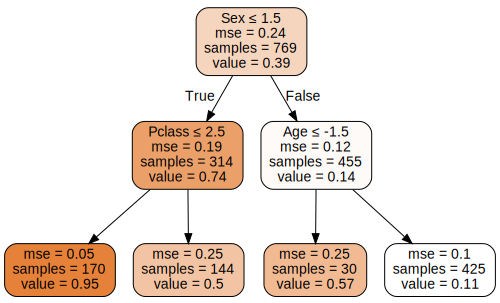

In [63]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

In [64]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', 'C:\\Users\\Zbook\\AppData\\Local\\Temp\\DTreeViz_16052.svg', 'C:/Users/Zbook/AppData/Local/Temp\\DTreeViz_16052'], make sure the Graphviz executables are on your systems' PATH

#### Root Mean Squared Error

In [65]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [66]:
m = DecisionTreeRegressor(min_samples_leaf=30)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.328493, 0.562808)

In [67]:
m_rmse(m, valid_xs, valid_y)

0.562808

### Random Forest

In [68]:
def rf(xs, y, n_estimators=40, max_samples=700,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [69]:
m = rf(xs, y)

In [70]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.260553, 0.480453)

In [71]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [72]:
r_mse(preds.mean(0), valid_y)

0.480453

##### Out of Bag Errornya lebih rendah dari Validation set Error

In [73]:
r_mse(m.oob_prediction_, y)

0.335833

In [74]:
preds.shape

(40, 122)

##### Yakin oleh prediksinya?

In [75]:
preds_std = preds.std(0)
preds_std[:5]

array([0.35901424, 0.36687882, 0.35941466, 0.3382939 , 0.38724819])

## Feature Importance

In [76]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [77]:
fi = rf_feat_importance(m, xs)
fi

,cols,imp
2,Sex,0.406017
0,Pclass,0.113274
11,Fare,0.092324
3,Ticket,0.089252
8,Age,0.067625
4,Cabin,0.061288
7,PassengerId,0.056633
1,Name,0.055535
9,SibSp,0.022391
10,Parch,0.019203


In [78]:
to_keep = fi[fi.imp>0.05].cols
len(to_keep)

8

In [79]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y)

In [80]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.26291, 0.474483)

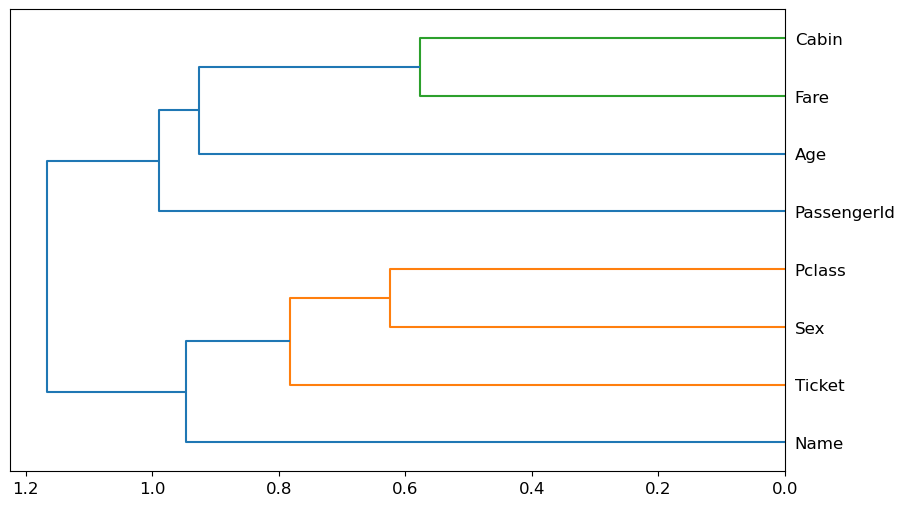

In [81]:
cluster_columns(xs_imp)

In [82]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=700, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [83]:
get_oob(xs_imp)

0.4961115631260148

In [127]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'SibSp', 'Cabin')}

KeyError: "['SibSp'] not found in axis"

In [128]:
to_drop = ['Cabin']
get_oob(xs_imp.drop(to_drop, axis=1))

0.4856863179692015

In [129]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [130]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.262194, 0.507343)

#### Out Of Domain Data

In [131]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
1,Pclass,0.365297
0,Sex,0.354622
2,Fare,0.165003
3,Ticket,0.071886
4,Age,0.032746
5,PassengerId,0.007397


In [132]:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('Pclass','Sex','Ticket'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.49987
Pclass 0.475487
Sex 0.717869
Ticket 0.480324


In [133]:
time_vars = ['Pclass','Ticket']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.51064

In [134]:
m = rf(xs_final_time, y)
m_rmse(m, xs_final_time, y), m_rmse(m, valid_xs_time, valid_y)

(0.29369, 0.502169)

# Feature Engineering

In [143]:
for df in [train_df, test_df]:
    df['Title'] = df['Name'].str.split(',').str[1].str.split(' ').str[1]
    df['Deck'] = df['Cabin'].str[0]

In [144]:
all_df = pd.concat([train_df, test_df], sort=False)
mean_age_by_title = all_df.groupby('Title').mean()['Age']

In [145]:
for df in [train_df, test_df]:
    for title, age in mean_age_by_title.iteritems():
        df.loc[df['Age'].isnull() & (df['Title'] == title), 'Age'] = age

In [160]:
dls = to.dataloaders(1024)

In [166]:
np.random.seed(101)
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,nan,93.024475,0.631148,00:00
1,nan,93.024475,0.631148,00:00
2,nan,93.024475,0.631148,00:00
3,nan,93.024475,0.631148,00:00
4,nan,93.024475,0.631148,00:00


In [170]:
output= pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y})
output.to_csv('my_submission_titanic.csv', index=False)
output.head()

,PassengerId,Survived
0,892.0,0.0
1,893.0,1.0
2,894.0,1.0
3,895.0,1.0
4,896.0,0.0
